In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json._normalize import nested_to_record

%matplotlib inline

## gather data df

In [2]:
sample_name = "data/num_train_samples"
metric_name = "test/roc_auc"
loss_name = "test/loss"
temporal_loss_name = "test/temporal_loss"
pretrained_names = ["nyutron (ours)", "bioclinicalBert"]

In [3]:
pull_from_wandb = False

if pull_from_wandb:
    import wandb

    api = wandb.Api()
    username = "lavender"
    project_name = "mimic-readmission"
    # Project is specified by <entity/project-name>
    runs = api.runs(f"{username}/{project_name}")
    summary_list = []
    config_list = []
    name_list = []
    for run in runs:
        # run.summary are the output key/values like accuracy.
        # We call ._json_dict to omit large files
        summary_list.append(run.summary._json_dict)

        # run.config is the input metrics.
        # We remove special values that start with _.
        conf = nested_to_record(run.config, sep="/")
        config = {k: v for k, v in conf.items() if not k.startswith("_")}
        config_list.append(config)

        # run.name is the name of the run.
        name_list.append(run.name)

    import pandas as pd

    summary_df = pd.DataFrame.from_records(summary_list)
    config_df = pd.DataFrame.from_records(config_list)
    name_df = pd.DataFrame({"name": name_list})
    data_df = pd.concat([name_df, config_df, summary_df], axis=1)[
        [sample_name, "run/seed", metric_name, "data/tokenized_data_path"]
    ]

    data_df.to_csv("raw_data/mimic.csv")
else:
    data_df = pd.read_csv("raw_data/mimic.csv", index_col=0)

In [4]:
data_df = data_df.rename(columns={"pretrained": "pretrained LLM"})

In [5]:
data_df

,data/num_train_samples,run/seed,test/roc_auc,data/tokenized_data_path,pretrained LLM
0,42180,36,0.644924,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
1,10000,24,0.596638,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
2,100,36,0.516617,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
3,42180,42,0.639053,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
4,42180,24,0.642240,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
5,42180,13,0.625810,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
6,42180,0,0.624004,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
7,10000,42,0.604181,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
8,10000,36,0.591273,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
9,10000,13,0.577620,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert


In [6]:
def prep(df):
    df = df.rename(
        columns={
            sample_name: "Number of Train Examples",
            metric_name: "Same-time Test AUROC",
        }
    )
    return df


df_plot = prep(data_df)

In [7]:
import numpy as np

np.unique(np.array(df_plot["pretrained LLM"]))

array(['bioclinicalBert', 'nyutron (ours)'], dtype=object)

In [8]:
df_plot

,Number of Train Examples,run/seed,Same-time Test AUROC,data/tokenized_data_path,pretrained LLM
0,42180,36,0.644924,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
1,10000,24,0.596638,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
2,100,36,0.516617,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
3,42180,42,0.639053,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
4,42180,24,0.642240,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
5,42180,13,0.625810,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
6,42180,0,0.624004,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
7,10000,42,0.604181,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
8,10000,36,0.591273,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert
9,10000,13,0.577620,/gpfs/data/oermannlab/users/lavender/NYUTron_h...,bioclinicalBert


## Plot combined dfs

In [9]:
df_plot["pretrained LLM"] = pd.Categorical(
    df_plot["pretrained LLM"], categories=pretrained_names, ordered=True
)
df_plot = df_plot.sort_values(by="pretrained LLM")

# Start here for cache

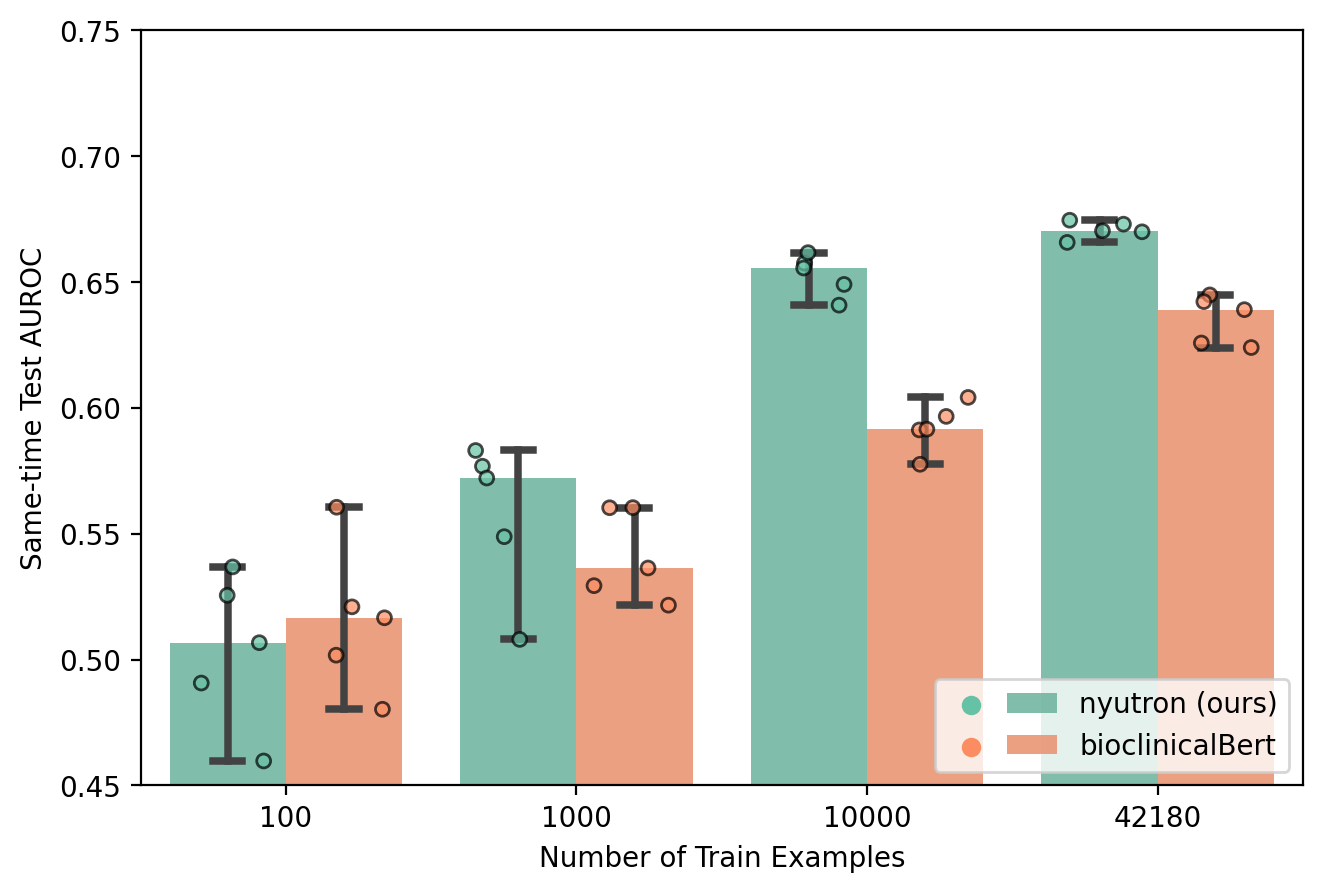

In [11]:
from matplotlib.legend_handler import HandlerTuple

fig = plt.figure(figsize=(7.5, 5), dpi=200)
ax = sns.barplot(
    x="Number of Train Examples",
    y="Same-time Test AUROC",
    hue="pretrained LLM",
    capsize=0.1,
    alpha=0.9,
    errorbar=lambda x: (x.min(), x.max()),
    data=df_plot,
    estimator=np.median,
    palette=sns.color_palette("Set2", 2),
)
sns.stripplot(
    x="Number of Train Examples",
    y="Same-time Test AUROC",
    hue="pretrained LLM",
    data=df_plot,
    dodge=True,
    alpha=0.7,
    ax=ax,
    s=5,
    jitter=0.3,
    palette=sns.color_palette("Set2", 2),
    linewidth=1,
    edgecolor="black",
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=[(handles[idx], handles[idx + 2]) for idx in range(2)],
    labels=labels[:2],
    loc="lower right",
    handlelength=4,
    handler_map={tuple: HandlerTuple(ndivide=None)},
)
plt.ylim([0.45, 0.75])
plt.savefig("AIP_plots/ext_9.png", bbox_inches="tight", dpi=300)